# Data Visualization

## Prepare sample data

Import the relevant libraries and create a dataframe containing the sample dataset that comes built-into scikit-learn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

plt.rcParams["figure.figsize"] = (10, 10)

def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns = ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

In [2]:
df = get_iris_df()

## 5.3 Pie Charts

Text(0.5, 1.0, 'Breakdown for sepal width (cm)')

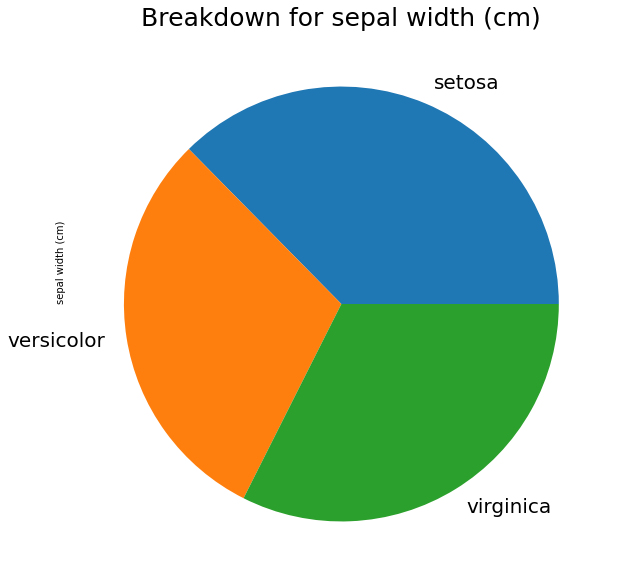

In [3]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=25)
#plt.savefig('iris_pie_for_one_variable.jpg')
#plt.close()

Previous plot was called from a Pandas Series object (```sums_by_species[var]```).

Call from Pandas DataFrame with multiple columns will generate a different chart for each column within the same figure

Text(0.5, 1.0, 'Total Measurements, by Species')

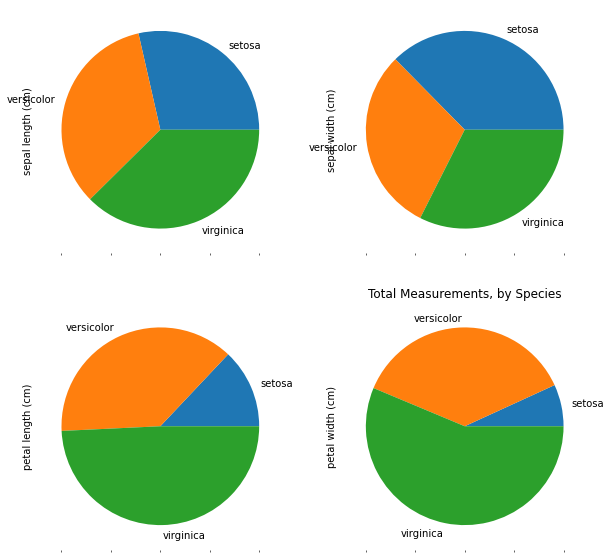

In [4]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True, layout=(2,2), legend=False)
plt.title('Total Measurements, by Species')
#plt.savefig('iris_pie_for_each_variable.jpg')
#plt.close()

## 5.4 Bar Charts

Text(0.5, 0.98, 'Total Measurements, by Species')

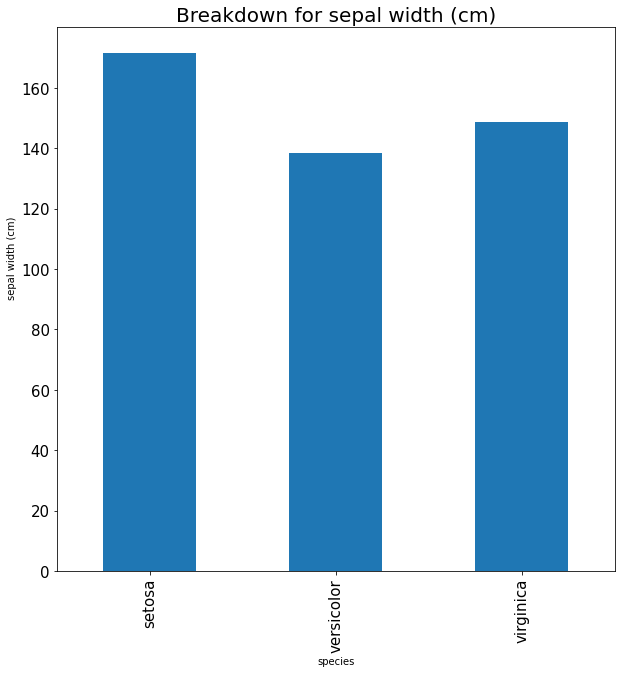

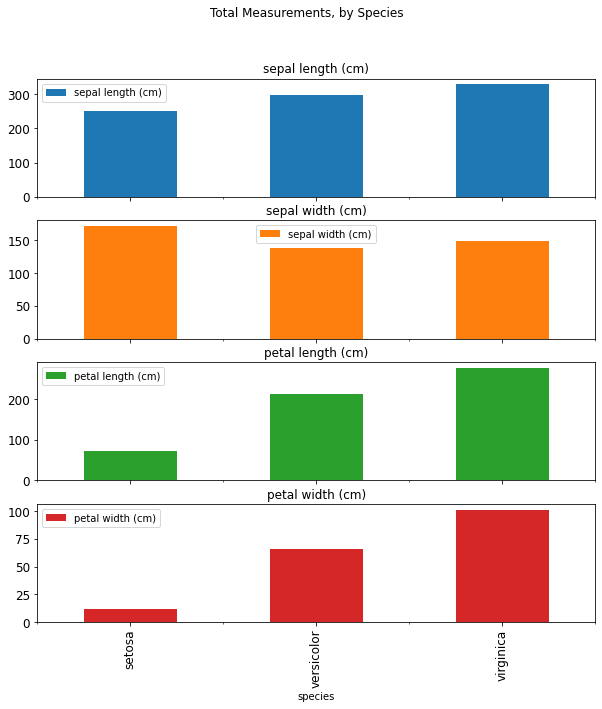

In [5]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=20)
#plt.savefig('iris_bar_for_one_variable.jpg')
#plt.close()
sums_by_species.plot(kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')
#plt.savefig('iris_bar_for_each_variable.jpg')
#plt.close()


## 5.5 Histograms

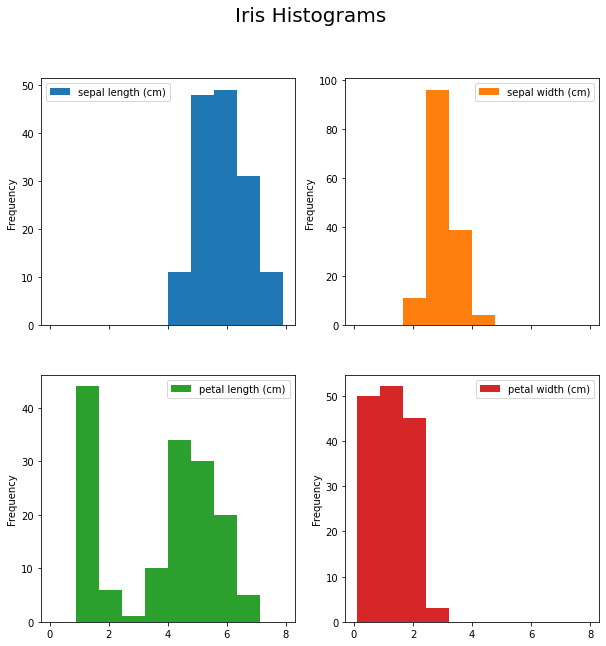

In [6]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

Petal length shows ___bimodal___ distribution, suggesting one species having categorically longer petals.

Confirm this finding by plotting each species separately, but on the same axes and in different colours.

Text(0.5, 0.98, 'Petal Length by Species')

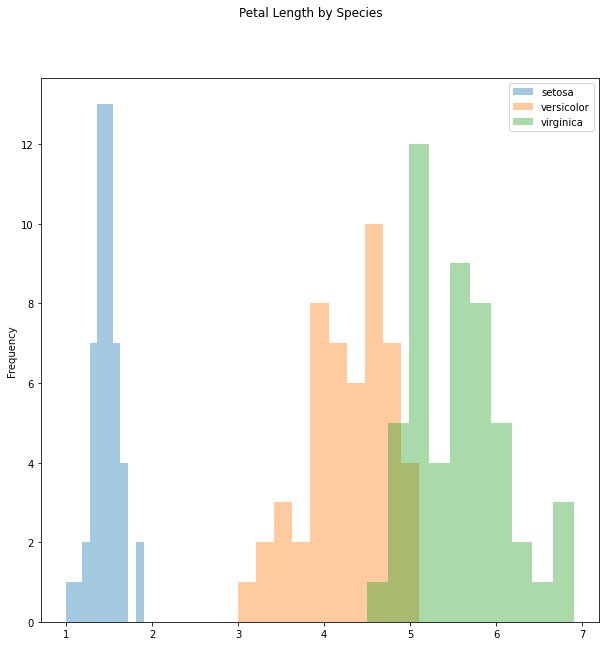

In [7]:
for spec in df.species.unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)
    
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
#plt.savefig('iris-Hist_by_spec.jpg')

## 5.6 Means, Standard Deviations, Medians, and Quantitle

Summarize a distribution down to just a few numbers. Usually the summaries are based on the assumption that the data's distribution is bell-shaped, and the goal is to give some idea of where the peak of the bell is and how widely it spreads:
1. Give the means and standard deviation. These are the conventionally populare metrics and are much easier to compute
2. Give the median, 25th percentile, and the 75th percentile. These metrics are more robust to pathologies in the data, but they are computationally more expensive (as the data needs to be sorted)

In [8]:
col = df['petal length (cm)']
Average = col.mean()
SD = col.std()
Median = col.quantile(0.5)
Percentile25 = col.quantile(0.25)
Percentile75 = col.quantile(0.75)

print('Average =', Average)
print('SD =', SD)
print('Median =', Median)
print('25th Percentile = ', Percentile25)
print('75th Percentile = ', Percentile75)

Average = 3.7580000000000027
SD = 1.7652982332594667
Median = 4.35
25th Percentile =  1.6
75th Percentile =  5.1


One technique to filter out "outliers" is to filter out anything below the 25th percentile or above the 75th percentile

In [9]:
typical_data = col[(col > Percentile25) & (col < Percentile75)]
Clean_Avg = typical_data.mean()
print('Clean Average =', Clean_Avg)

Clean Average = 4.0984375


## 5.7 Boxplots

Boxplots are a convenient way to summarize a dataset by showing the median, quantiles and min/max values for each of the variables.

Applied to the flower data, the boxplot makes it obvious that the three species are different from each other.

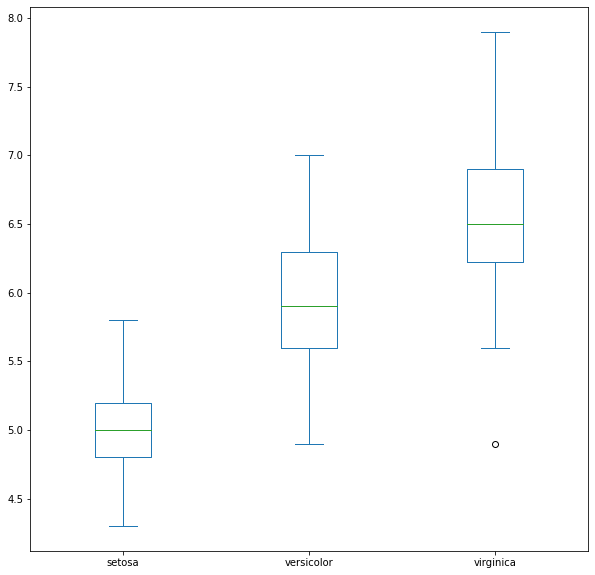

In [10]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i % 50)
df.pivot('ind', 'species')[col].plot(kind='box')
plt.show()

## 5.8 Scatterplots

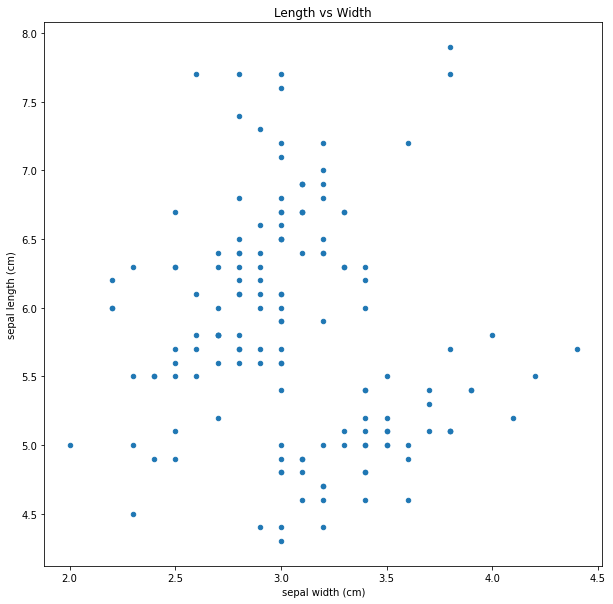

In [11]:
df.plot(kind='scatter', x='sepal width (cm)', y='sepal length (cm)')
plt.title("Length vs Width")
plt.show()

Separate by colours and shapes

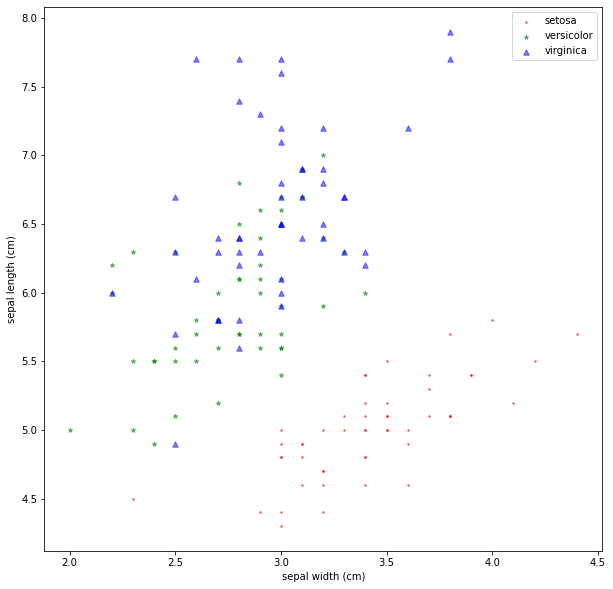

In [12]:
colours = ['r','g','b']
markers = ['.', '*', '^']
fig, ax = plt.subplots(1, 1)
for i, species in enumerate(df.species.unique()):
    ddf = df[df.species == species]
    ddf.plot(kind='scatter', x='sepal width (cm)', y='sepal length (cm)', alpha=0.5, s=10*(i+1), ax=ax, color=colours[i], marker=markers[i], label=species)
plt.legend()
plt.show()

## 5.9 Scatterplots with Logarithmic Axes

For cases where the numbers being plotted are all non-negative, but vary by orders of magnitude, e.g. data on traffic to a collection of websites, personal income, etc. 

Using the Boston Housing Dataset for the exercise.There are 14 attributes in each case of the dataset. T- hey are:
- CRIM - per capita crime rate by to- wn
- ZN - proportion of residential lan- d zoned for lots over 25,000 sq.ft.
- INDUS - proportion of-  non-retail-  business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's


In [13]:
# Prepare pandas dataframe
bs = sklearn.datasets.load_boston() # Boston house prices
dfb = pd.DataFrame(bs.data, columns=bs.feature_names)
dfb['MEDV'] = bs.target

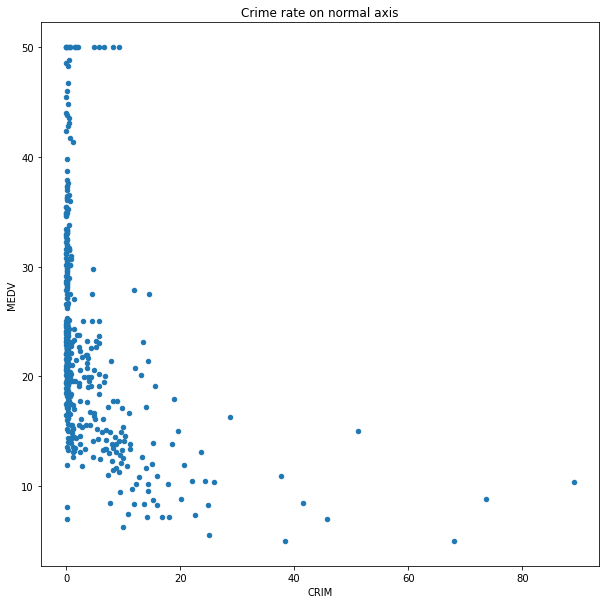

In [14]:
# Normal Scatterplot
dfb.plot(x='CRIM', y='MEDV', kind='scatter')
plt.title('Crime rate on normal axis')
plt.show()

All the data points are squashed to the left. So change x-axis to be logarithmic: (graph now shows inverse relationship betwen crime rate and median home value)

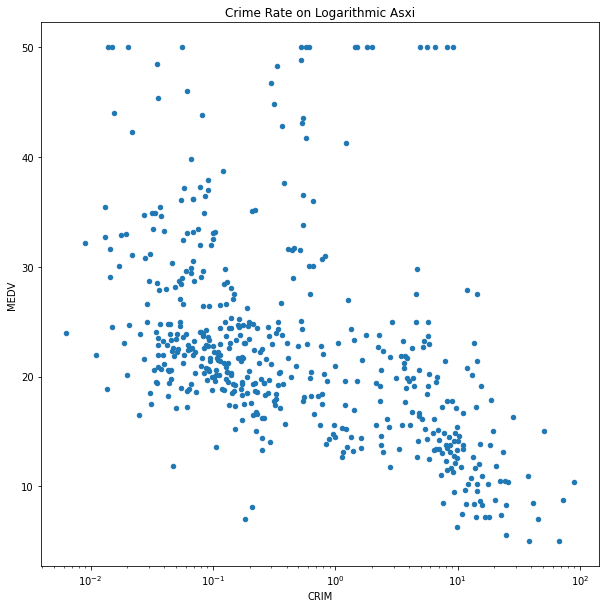

In [15]:
dfb.plot(x='CRIM', y='MEDV', kind='scatter', logx=True)
plt.title('Crime Rate on Logarithmic Asxi')
plt.show()

## 5.10 Scatter Matrices

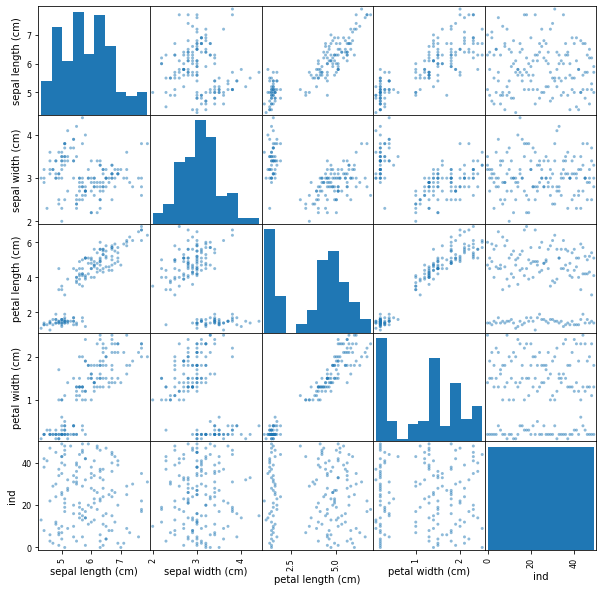

In [16]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

# 5.11 Heatmaps

Heapmaps colour codes different regions of the plane by their relative density of points. In some applications, including Pandas, the regions are small hexagons and the heatmaps are called "hexbin" heatmaps.

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

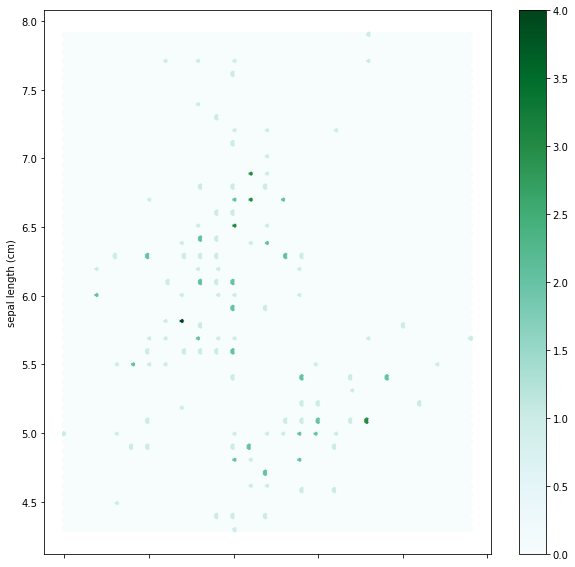

In [17]:
df.plot(kind='hexbin', x='sepal width (cm)', y='sepal length (cm)')

## 5.12 Correlations

A Correlation is a metric that measures how closely tied two variables _X_ and _Y_ are, and there are two main types:
1. Pearson correlation -- it measures how accurate it is to say that $$Y=mx + b$$ A correlation near 1 means that, for some $b$ and some $m>0$ this equation is a good approximation. (near -1 means the same except $m$ is negative
2. Ordinal correlations -- Makes no assumption about $X$ and $Y$ having a linear relationship. It just models their relationship as being _monotonic_:
    - if you sorted your data points by their $X$ value, is that more or less the same order you would get from sorting them by their $Y$ value?
    - two main types of ordinal correlation: Spearman and Kendall

In [18]:
corr1 = df["sepal width (cm)"].corr(df["sepal length (cm)"]) #Pearson corr is the default
corr2 = df["sepal width (cm)"].corr(df["sepal length (cm)"], method = "pearson")

if corr1 == corr2:
    print("Pearson correlation between sepal width and sepal length is", corr1)
else:
    print("corr 1 =", corr1, " and corr 2 =", corr2)
    
corr3 = df["sepal width (cm)"].corr(df["sepal length (cm)"], method = "spearman")
print("Spearman correlation between sepal width and sepal length is", corr3)

Pearson correlation between sepal width and sepal length is -0.11756978413300208
Spearman correlation between sepal width and sepal length is -0.166777658283235


## 5.14 Time Series
Time series data is one of the most important data types in the world. Example data set from statsmodel describes measurements of atmospheric CO<sub>2</sub> levels over many years. We can see in the below plot that CO<sub>2</sub> fluctuates on a yearly cycle and that it increases overall across time.

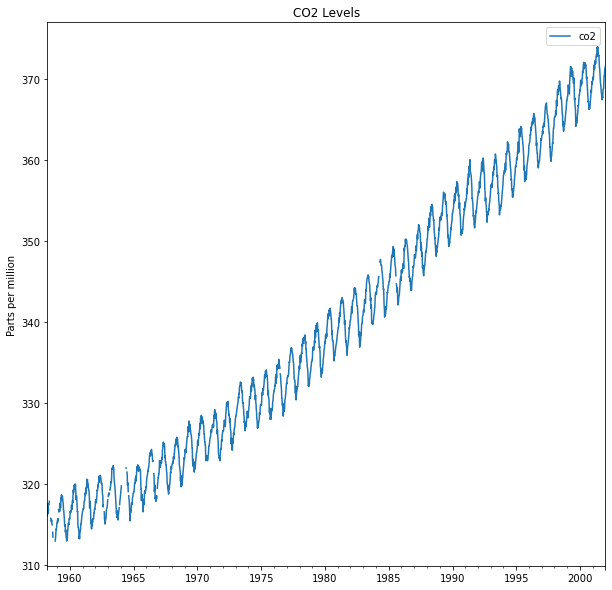

In [19]:
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()